# Разведывательный анализ данных

Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет
на их успеваемость по математике, чтобы на ранней стадии выявлять студентов,
находящихся в группе риска.

Данные представляют собой параметры, характеризующие условия жизни учеников.

Основные цели проекта:    
- Проверить качество данных и очистить их, если это необходимо. 
- Определиться с параметрами модели. 
- Сформулировать предположения и гипотезы для дальнейшего построения модели.
        
Задачи проекта:
1. Первичный осмотр данных
2. Первичный анализ данных  в столбцах
3. Корреляционный анализ
4. Анализ номинативных переменных
5. Подготовка выводов

# Первичный осмотр данных

Импортируем нужные для чтения и первичного анализа библиотеки и прочитаем файл:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

df = pd.read_csv('stud_math.csv')

Рассмотрим, какие данные хранятся в файле и какие типы данных у столбцов:

In [2]:
display(df.head(10))
df.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

Всего в датасете 13 числовых и 17 строковых слолбцов

Как мы видим, пропусков в каждом столбце не так много. Сколько строк останется, если удалить пропуски?

In [3]:
df.dropna()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
10,GP,F,15,U,GT3,T,4.0,4.0,teacher,health,reputation,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,3.0,3.0,3.0,2.0,0.0,45.0
14,GP,M,15,U,GT3,A,2.0,2.0,other,other,home,other,1.0,3.0,0.0,no,yes,no,no,yes,-9.0,yes,yes,yes,4.0,5.0,2.0,3.0,0.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,MS,M,18,R,GT3,T,2.0,1.0,other,other,other,mother,2.0,1.0,0.0,no,no,no,yes,no,-3.0,yes,yes,yes,4.0,4.0,3.0,5.0,5.0,35.0
386,MS,F,18,R,GT3,T,4.0,4.0,teacher,at_home,reputation,mother,3.0,1.0,0.0,no,yes,yes,yes,yes,-3.0,yes,yes,yes,4.0,4.0,3.0,5.0,7.0,30.0
387,MS,F,19,R,GT3,T,2.0,3.0,services,other,course,mother,1.0,3.0,1.0,no,no,no,yes,no,-9.0,yes,yes,no,5.0,4.0,2.0,5.0,0.0,0.0
388,MS,F,18,U,LE3,T,3.0,1.0,teacher,services,course,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,4.0,3.0,4.0,1.0,0.0,40.0


Осталось примерно четверть записей, что довольно мало. Не будем так делать.

Для удобства переименуем столбцы

In [4]:
df.columns=(['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime_granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'])

In [5]:
df.head()

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


# Первичный анализ данных в столбцах

### Для начала посмотрим на признаки и разделим их на типы.

1. Числовые - 3: age, absences, score
2. Категориальные - бинарные - 13 шт.: school(это стало понятно не сразу), sex, address, famsize, pstatus, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic.
3. Категориальные - оценочные - 14 шт.: medu, fedu, mjob, fjob, reason, guardian, traveltime, studytime, studytime_granular, failures, famrel, freetime, goout, health

Начнем с числовых признаков.

# Числовые признаки

## Age
возраст ученика (от 15 до 22)

In [6]:
pd.DataFrame(df.age.value_counts())

,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


Пропуски:

In [7]:
df.age.isnull().sum()

0

В данном столбце нет пропусков.
Распределение нормальное, но значения 20, 21 и 22 явно выделяются. Интуиция подсказывает их удалить, но для начала воспользуемся одним из стандартных методов определения выбросов.
Для наглядности построим график распределения признака.

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

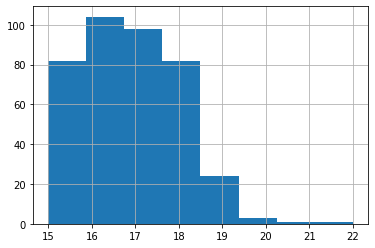

In [8]:
df.age.hist(bins=8)
df.age.describe()

Напишем функцию отсечения выбросов по формуле интерквартильного расстояния и отрисовки гистаграммы распределения без выбросов. Эту функцию мы сможем в дальнейшем использовать и для других числовых признаков

In [9]:
def outliers_iqr(ys): # Передаем на вход признак-столбец датафрейма
    # Находим необходимые параметры
    median = ys.median()
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    print('Медиана: {},'.format(median),'25-й перцентиль: {},'.format(quartile_1), '75-й перцентиль: {},'.format(quartile_3)
      , "IQR: {}, ".format(iqr),"Границы выбросов: [{}, {}].".format(lower_bound,upper_bound))
    # Отбрасываем значения, лежещие за пределами границ, рисуем график
    ys.loc[ys.between(lower_bound, upper_bound)].hist(bins = int(upper_bound-lower_bound), range = (lower_bound, upper_bound), label = 'IQR')
    plt.legend();
    # На выход отдаем отфильтрованные значения
    return ys.mask((ys > upper_bound) | (ys < lower_bound))

Применим нашу функцию к признаку "Age"

Медиана: 17.0, 25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


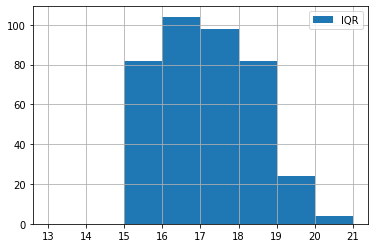

In [10]:
age_outliners_free = outliers_iqr(df.age)

Как мы видим, знечения 20 и 21 не являются выбросами по формуле интерквартильного расстояния. Хорошо, что сразу их не удалили.

избавимся от выбросов:

In [11]:
df = df.loc[df.age<22]

На всякий случай проверим, что фильтрация выбросов прошла успешно.

In [12]:
df.age.value_counts()

16    104
17     98
18     82
15     82
19     24
20      3
21      1
Name: age, dtype: int64

## Absences
количество пропущенных занятий

Напишем функцию, которая выдаст нам необходимую информацию для первичного анализа признака.

In [13]:
def col_info(ys):
    print('Количество пропусков: {},'.format(ys.isnull().sum()))
    print('{},'.format(ys.describe()))
    print('Распределение:\n{},'.format(ys.value_counts()))
    ys.hist()

Применим функцию для анализа признака:

Количество пропусков: 12,
count    382.000000
mean       7.256545
std       23.491712
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64,
Распределение:
0.0      111
2.0       60
4.0       53
6.0       31
8.0       21
10.0      17
12.0      12
14.0      12
3.0        8
16.0       6
7.0        6
5.0        5
18.0       5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64,


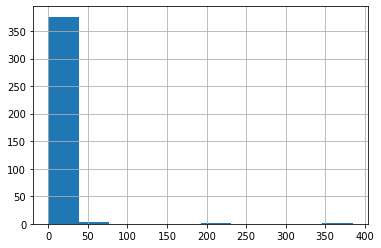

In [14]:
col_info(df.absences)

У нас 12 пропусков. Заменим их на среднее значение.

In [15]:
df.absences = df.absences.fillna(df.absences.mean())

Ученики в основном не много пропускают.
75% значений лежат в пределах от 0 до 8.
Найдем границы выбросов и посмотрим на очищенные данные.

Медиана: 4.0, 25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


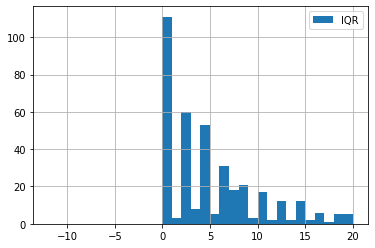

In [16]:
absences_outliers_free = outliers_iqr(df.absences)

Значения, превышающие 20, являются выбросами. Посмотрим, сколько таких значений в датасете:

In [17]:
df[df.absences > 20].absences.count()

17

Довольно много, но числовых признаков кроме целевого у нас всего 2 и будем надеяться, что большое количество данных не потеряем. Избавимся от выбросов.

In [18]:
df = df.loc[df.absences<21]

## Score
баллы по госэкзамену по математике

Количество пропусков: 6,
count    371.000000
mean      52.264151
std       23.094876
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64,
Распределение:
50.0     54
55.0     42
0.0      37
75.0     33
60.0     31
65.0     30
70.0     27
40.0     27
45.0     23
80.0     16
30.0     14
90.0     10
35.0      9
25.0      7
95.0      5
85.0      5
100.0     1
Name: score, dtype: int64,


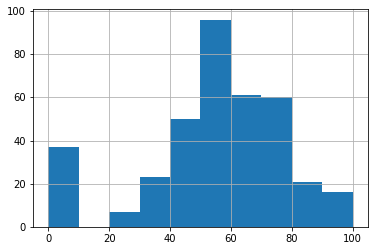

In [19]:
col_info(df.score)

Это наша целевая переменная. Распределение нормальное, если не считать 37 учеников, получивних 0 баллов.

Пропусков всего 6, заменим их на среднее значение

In [20]:
df.score = df.score.fillna(df.score.mean())

Опредилим границы выбросов:

Медиана: 55.0, 25-й перцентиль: 45.0, 75-й перцентиль: 70.0, IQR: 25.0,  Границы выбросов: [7.5, 107.5].


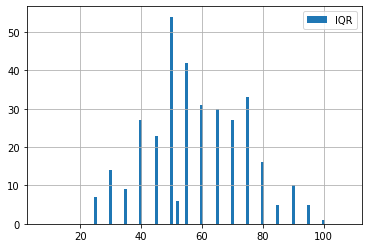

In [21]:
score_outliers_free = outliers_iqr(df.score)

Значение 0 является выбросом. Странно, что между значениями 0 и 20 ничего нет. Возможно, это означает, что ученик вовсе не пришел на экзамен или был удален за списывание.

Думаю, что логичным шагом здесь будет сделать дополнительный параметр "zero_score" и присвоить "1" в случае, если ученик получил нулевой балл на экзамене, и "0", если оценка отличается от нулевой. После этого нулевые оценки заменим на среднее значение.

In [22]:
df['zero_score'] = df.score.apply(lambda x: 1 if x == 0 else 0)

Проверим, что признак сформирован верно

In [23]:
df.zero_score.value_counts()

0    340
1     37
Name: zero_score, dtype: int64

Теперь заменим нулевые оценки на средние значения.

In [24]:
df.score = df.score.apply(lambda x: df.score.mean() if x == 0 else x)

# Категориальные - бинарные признаки

## School
аббревиатура школы, в которой учится ученик

Количество пропусков: 0,
count     377
unique      2
top        GP
freq      332
Name: school, dtype: object,
Распределение:
GP    332
MS     45
Name: school, dtype: int64,


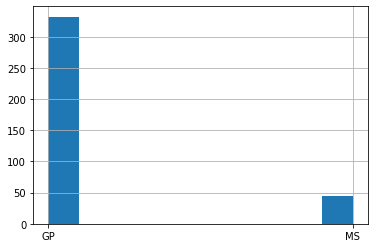

In [25]:
col_info(df.school)

Всего две школы, значит относим этот признак к бинарным. Нет пропусков. В GP учеников значительно больше.

Напишем функцию замены признака на несколько бинарных, для пропусков создается отдельный столбец.

In [26]:
def split_dummies(ys,dataframe):
    # Заменяем пропуски на 'na', чтобы их тоже учитывать
    ys = ys.fillna('na')
    # Создаем dummies с префиксом - имя столбца
    ys_dummies = pd.get_dummies(ys, prefix = ys.name)
    # Удаляем исходный столбец и добавляем dummies
    dataframe = dataframe.drop(ys.name, axis=1).join(ys_dummies)
    return dataframe

Применять функцию пока не будем т.к. это выходит за рамки EDA (если я правильно понял), и нам ещё предстоит анализ номинативных переменных.

## Sex
пол ученика ('F' - женский, 'M' - мужской)

Количество пропусков: 0,
count     377
unique      2
top         F
freq      195
Name: sex, dtype: object,
Распределение:
F    195
M    182
Name: sex, dtype: int64,


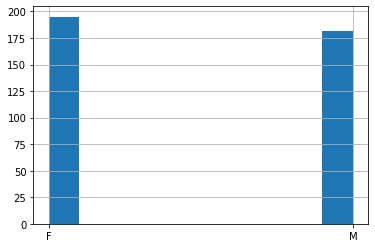

In [27]:
col_info(df.sex)

Девочек чуть больше. Пропусков нет.

Этот столбец для дальнейшего анализа нужно будет преобразовать через наш метод split_dummies(), однако сейчас мы делать этого не будем.

## Address
тип адреса ученика ('U' - городской, 'R' - за городом)

Количество пропусков: 17,
count     360
unique      2
top         U
freq      279
Name: address, dtype: object,
Распределение:
U    279
R     81
Name: address, dtype: int64,


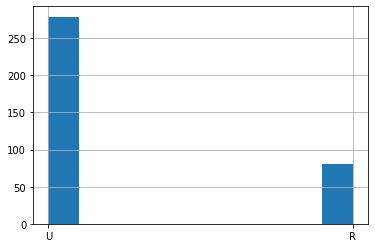

In [28]:
col_info(df.address)

Большинство учеников живут в городе

В данном столбце 17 пропусков. Мы можем в дальнейшем либо удалить эти строки, либо сделать dummy-переменную address_na, либо присвоить значение "U" т.к. учеников, живущих в городе почти в 4 раза больше. Пока что оставим как есть.

Этот столбец для дальнейшего анализа нужно будет преобразовать через ранее написанную функцию split_dummies(), однако сейчас мы делать этого не будем.
Наша функция поможет нам учесть пропуски в виде отдельного столбца.

## Famsize
размер семьи('LE3' <= 3, 'GT3' >3)

Количество пропусков: 25,
count     352
unique      2
top       GT3
freq      248
Name: famsize, dtype: object,
Распределение:
GT3    248
LE3    104
Name: famsize, dtype: int64,


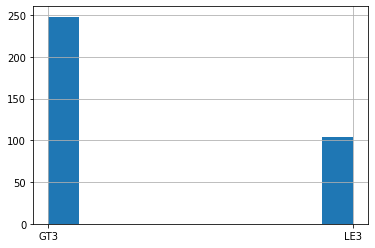

In [29]:
col_info(df.famsize)

В большинстве случаев преобладает значение "GT3". 25 пропусков - довольно много. Мы можем их либо удалить эти строки, либо сделать dummy-переменную famsize_na, либо присвоить значение "GT3". Пока что оставим как есть.

Этот столбец для дальнейшего анализа нужно будет преобразовать через ранее написанную функцию split_dummies(), однако сейчас мы делать этого не будем.

## Pstatus
статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

Количество пропусков: 40,
count     337
unique      2
top         T
freq      305
Name: pstatus, dtype: object,
Распределение:
T    305
A     32
Name: pstatus, dtype: int64,


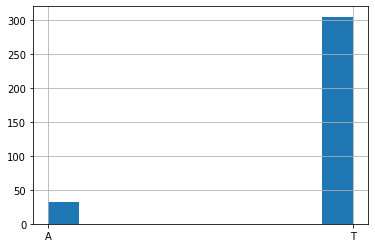

In [30]:
col_info(df.pstatus)

Аналогично предыдущим двум столбцам, но здесь можно быть смелее с заменой пропусков на преобладающее значение.

Этот столбец для дальнейшего анализа нужно будет преобразовать через ранее написанную функцию split_dummies(), однако сейчас мы делать этого не будем.

# Schoolsup
дополнительная образовательная поддержка (yes или no)

Количество пропусков: 9,
count     368
unique      2
top        no
freq      320
Name: schoolsup, dtype: object,
Распределение:
no     320
yes     48
Name: schoolsup, dtype: int64,


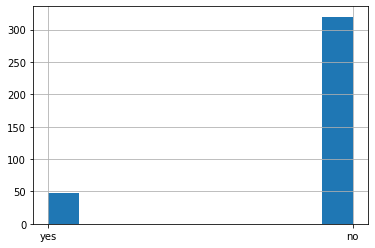

In [31]:
col_info(df.schoolsup)

Этот столбец для дальнейшего анализа нужно будет преобразовать через ранее написанную функцию split_dummies(), однако сейчас мы делать этого не будем.

## Famsup
семейная образовательная поддержка (yes или no)

Количество пропусков: 35,
count     342
unique      2
top       yes
freq      210
Name: famsup, dtype: object,
Распределение:
yes    210
no     132
Name: famsup, dtype: int64,


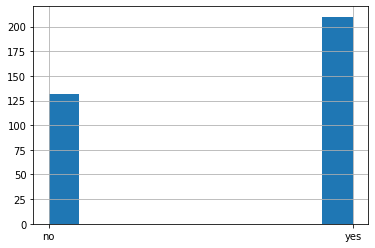

In [32]:
col_info(df.famsup)

Аналогично признаку 'Schoolsup', мы видим распределение и количество пропусков.
Этот столбец для дальнейшего анализа нужно будет преобразовать через ранее написанную функцию split_dummies(), однако сейчас мы делать этого не будем.

# Paid
дополнительные платные занятия по математике (yes или no)

Количество пропусков: 39,
count     338
unique      2
top        no
freq      193
Name: paid, dtype: object,
Распределение:
no     193
yes    145
Name: paid, dtype: int64,


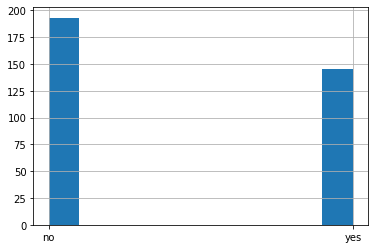

In [33]:
col_info(df.paid)

Аналогично признаку 'Schoolsup', мы видим распределение и количество пропусков.
Этот столбец для дальнейшего анализа нужно будет преобразовать через ранее написанную функцию split_dummies(), однако сейчас мы делать этого не будем.

## Activities
дополнительные внеучебные занятия (yes или no)

Количество пропусков: 14,
count     363
unique      2
top       yes
freq      190
Name: activities, dtype: object,
Распределение:
yes    190
no     173
Name: activities, dtype: int64,


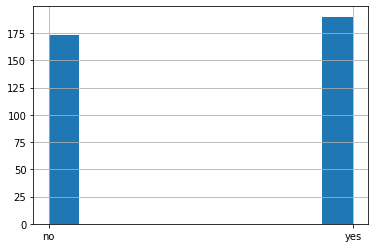

In [34]:
col_info(df.activities)

Аналогично признаку 'Schoolsup', мы видим распределение и количество пропусков.
Этот столбец для дальнейшего анализа нужно будет преобразовать через ранее написанную функцию split_dummies(), однако сейчас мы делать этого не будем.

## Nursery
посещал детский сад (yes или no)

Количество пропусков: 16,
count     361
unique      2
top       yes
freq      286
Name: nursery, dtype: object,
Распределение:
yes    286
no      75
Name: nursery, dtype: int64,


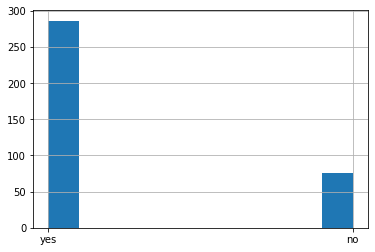

In [35]:
col_info(df.nursery)

Аналогично признаку 'Schoolsup', мы видим распределение и количество пропусков.
Этот столбец для дальнейшего анализа нужно будет преобразовать через ранее написанную функцию split_dummies(), однако сейчас мы делать этого не будем.

## Higher
хочет получить высшее образование (yes или no)

Количество пропусков: 19,
count     358
unique      2
top       yes
freq      341
Name: higher, dtype: object,
Распределение:
yes    341
no      17
Name: higher, dtype: int64,


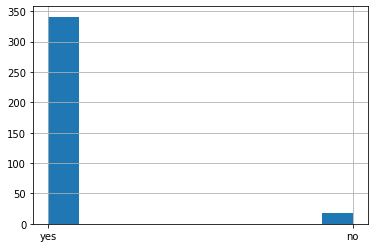

In [36]:
col_info(df.higher)

Аналогично признаку 'Schoolsup', мы видим распределение и количество пропусков.
Этот столбец для дальнейшего анализа нужно будет преобразовать через ранее написанную функцию split_dummies(), однако сейчас мы делать этого не будем.

## Internet
наличие интернета дома (yes или no)

Количество пропусков: 33,
count     344
unique      2
top       yes
freq      289
Name: internet, dtype: object,
Распределение:
yes    289
no      55
Name: internet, dtype: int64,


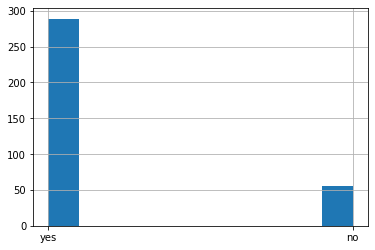

In [37]:
col_info(df.internet)

Аналогично признаку 'Schoolsup', мы видим распределение и количество пропусков.
Этот столбец для дальнейшего анализа нужно будет преобразовать через ранее написанную функцию split_dummies(), однако сейчас мы делать этого не будем.

## Romantic
в романтических отношениях (yes или no)

Количество пропусков: 30,
count     347
unique      2
top        no
freq      234
Name: romantic, dtype: object,
Распределение:
no     234
yes    113
Name: romantic, dtype: int64,


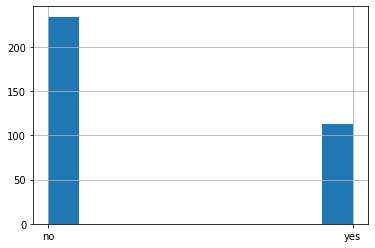

In [38]:
col_info(df.romantic)

Аналогично признаку 'Schoolsup', мы видим распределение и количество пропусков.
Этот столбец для дальнейшего анализа нужно будет преобразовать через нашу функцию split_dummies(), однако сейчас мы делать этого не будем.

# Категориальные-оценочные признаки

## Medu
образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

Количество пропусков: 3,
count    374.000000
mean       2.729947
std        1.107765
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: medu, dtype: float64,
Распределение:
4.0    124
2.0     98
3.0     90
1.0     59
0.0      3
Name: medu, dtype: int64,


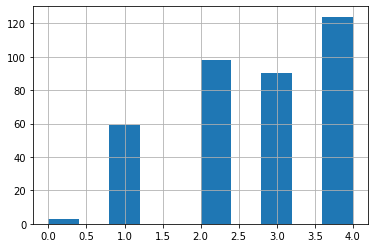

In [39]:
col_info(df.medu)

Всего 3 пропуска.

Матерей без образования довольно мало. Посмотрим, является ли это выбросом по формуле интерквартильного расстояния. Для этого воспользуемся написанной ранее функцией.

Медиана: 3.0, 25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [-1.0, 7.0].


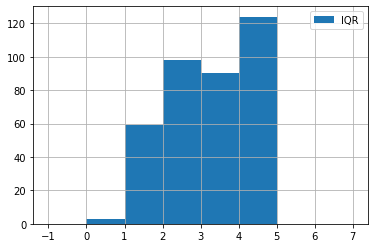

In [40]:
medu_outliers_free = outliers_iqr(df.medu.dropna()) #предварительно очистим от пропусков

Все значения попали в границы, значит выбросов нет.

Больше всего матерей с высшим образованием. Пропуски предлагаю в дальнейшем удалить т.к. их мало. Заполнить пропуски не получится т.к. существует 4 варианта для заполнения.

Удаляем пропуски

In [41]:
df = df.loc[df.medu.isna()==False]

## Fedu
образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

Количество пропусков: 23,
count    351.000000
mean       2.609687
std        2.281307
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: fedu, dtype: float64,
Распределение:
2.0     100
3.0      88
4.0      84
1.0      76
0.0       2
40.0      1
Name: fedu, dtype: int64,


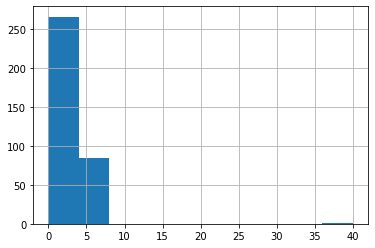

In [42]:
col_info(df.fedu)

В глаза явно бросается значение 40. Возможно это ошибка, и кто-то просто неправильно записал цифру "4", но тут можно только гадать.

Посмотрим на данные без выбросов, воспользовавшись нашей функцией

Медиана: 2.0, 25-й перцентиль: 2.0, 75-й перцентиль: 3.0, IQR: 1.0,  Границы выбросов: [0.5, 4.5].


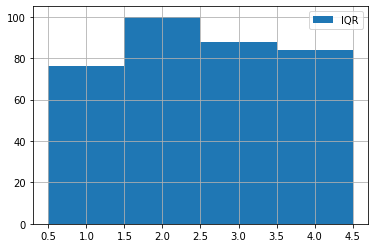

In [43]:
fedu_outliers_free = outliers_iqr(df.fedu.dropna())

Значение "0" и "40" оказались выбросами. Но 0 является легитимным вариантом, так бывает, что кто-то из отцов не имеет образование. Так что удалим только явно ошибочный вариант "40"

In [44]:
df = df.loc[df.fedu.between(-1,5)]

In [45]:
pd.DataFrame(df.fedu.value_counts())

,fedu
2.0,100
3.0,88
4.0,84
1.0,76
0.0,2


Образование отцов распределилось почти равномерно. Пропусков довольно много, удалять эти строки не хотелось бы. Но и заполнить пропуски не получится т.к. существует 4 варианта для заполнения.

## Mjob
работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

Количество пропусков: 17,
count       333
unique        5
top       other
freq        117
Name: mjob, dtype: object,
Распределение:
other       117
services     82
at_home      56
teacher      47
health       31
Name: mjob, dtype: int64,


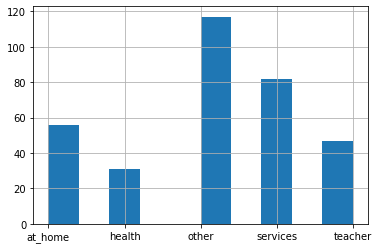

In [46]:
col_info(df.mjob)

Пропусков довольно много, удалять эти строки не хотелось бы. Но и заполнить пропуски не получится т.к. существует 5 вариантов для заполнения.

Этот столбец для дальнейшего анализа нужно будет преобразовать через метод split_dummies(), однако сейчас мы делать этого не будем.

## Fjob
работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

Количество пропусков: 33,
count       317
unique        5
top       other
freq        182
Name: fjob, dtype: object,
Распределение:
other       182
services     84
teacher      24
at_home      14
health       13
Name: fjob, dtype: int64,


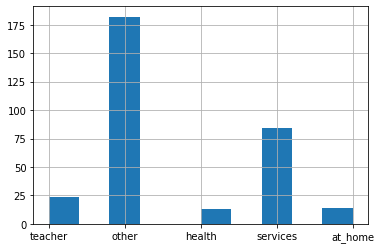

In [47]:
col_info(df.fjob)

Среди отцов намного меньше учителей, врачей и неработающих. Примерно столько же на гос.службе. Сильно выделяются другие специальности, что можно использовать при заполнении пропусков.

Этот столбец для дальнейшего анализа нужно будет преобразовать через метод split_dummies(), однако сейчас мы делать этого не будем.

## Reason
причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

Количество пропусков: 16,
count        334
unique         4
top       course
freq         126
Name: reason, dtype: object,
Распределение:
course        126
reputation     91
home           87
other          30
Name: reason, dtype: int64,


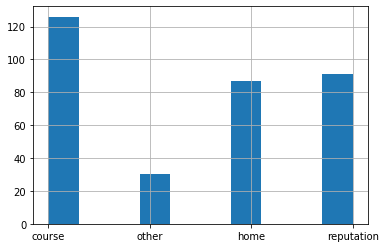

In [48]:
col_info(df.reason)

Пропусков довольно много, удалять эти строки не хотелось бы. Но и заполнить пропуски не получится т.к. существует 4 варианта для заполнения.

Этот столбец для дальнейшего анализа нужно будет преобразовать через метод split_dummies(), однако сейчас мы делать этого не будем.

## Guardian
опекун ('mother' - мать, 'father' - отец, 'other' - другое)

Количество пропусков: 29,
count        321
unique         3
top       mother
freq         223
Name: guardian, dtype: object,
Распределение:
mother    223
father     75
other      23
Name: guardian, dtype: int64,


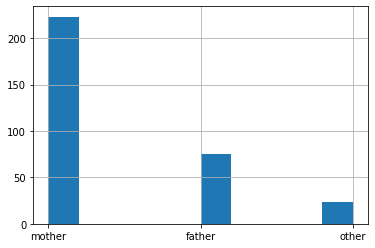

In [49]:
col_info(df.guardian)

29 пропусков, в большинстве случаев опекуном является мать.

Пропусков довольно много, удалять эти строки не хотелось бы. Но и заполнить пропуски не получится т.к. существует 3 варианта для заполнения.

Этот столбец для дальнейшего анализа нужно будет преобразовать через метод split_dummies(), однако сейчас мы делать этого не будем.

## Travaltime
 время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

Количество пропусков: 25,
count    325.000000
mean       1.455385
std        0.712765
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64,
Распределение:
1.0    212
2.0     85
3.0     21
4.0      7
Name: traveltime, dtype: int64,


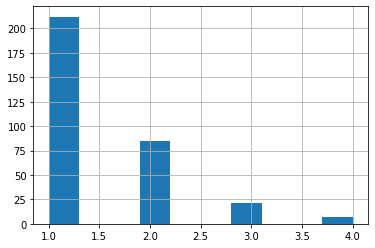

In [50]:
col_info(df.traveltime)

25 пропусков. Большинство учеников живет в 15 минутах от дома и меньше.
Думаю, что можем заменить пропуски на самое близкое к среднему значение - 1.

In [51]:
df.traveltime = df.traveltime.fillna(1)

Определим границы выбросов, воспользовавшись функцией outliers_iqr

Медиана: 1.0, 25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5].


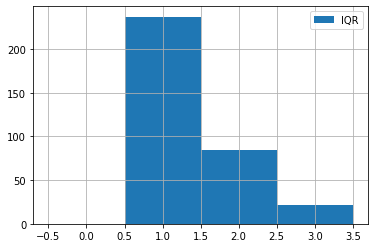

In [52]:
traveltime_outliers_free = outliers_iqr(df.traveltime.dropna())

значение "4" оказалось выбросом. Но это вполне легитимный вариант и придется удалить целых 7 записей, а в дальнейшем для других категориальных признаков этот метод будет показывать ещё больше выбросов. Так что не будем применять данный метод для категориальных переменных. Будем руководствоваться здравым смыслом и удалять только явные ошибки.

## Studytime
время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

Количество пропусков: 7,
count    343.000000
mean       2.037901
std        0.852426
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64,
Распределение:
2.0    169
1.0     93
3.0     56
4.0     25
Name: studytime, dtype: int64,


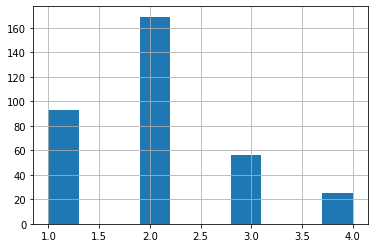

In [53]:
col_info(df.studytime)

Всего 7 пропусков. Большинство учеников тратят на учебу 2-2.5 часа. Заменим пропуски на "2" т.к. это самое близкое к среднему значение переменной.

In [54]:
df.studytime = df.studytime.fillna(2)

Определим границы выбросов, воспользовавшись функцией outliers_iqr

Медиана: 2.0, 25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5].


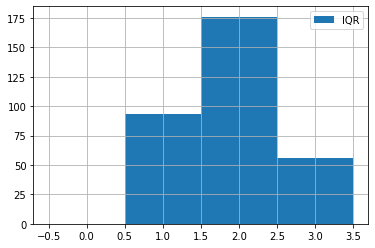

In [55]:
studytime_outliers_free = outliers_iqr(df.studytime.dropna())

Значение "4" оказалось выбросом. Ему соответствует 27 записей

Ещё раз убеждаемся, что данных метод лучше не применять, а то вскоре останемся совсем без данных. Оставим как есть.

## Studytime_granular

В описании датасета не было этого признака. Посмотрим, что из себя представляет этот столбец.

Количество пропусков: 7,
count    343.000000
mean      -6.113703
std        2.557277
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime_granular, dtype: float64,
Распределение:
-6.0     169
-3.0      93
-9.0      56
-12.0     25
Name: studytime_granular, dtype: int64,


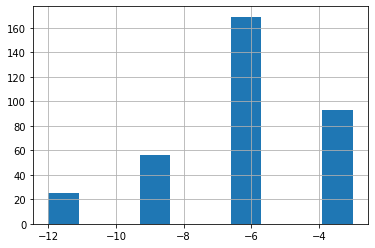

In [56]:
col_info(df.studytime_granular)

Видим, что значения являются результатом умножения значенияй признака "Studytime" на -3.
Определим, какой их признаков оставить, а какой удалить на следующих этапах.

Заменим пропуски на -6 т.к. значение близко к среднему

In [57]:
df.studytime_granular = df.studytime_granular.fillna(-6)

## Failures
количество внеучебных неудач (n, если 1<=n<3, иначе 0)

Количество пропусков: 17,
count    333.000000
mean       0.315315
std        0.736100
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64,
Распределение:
0.0    268
1.0     39
3.0     14
2.0     12
Name: failures, dtype: int64,


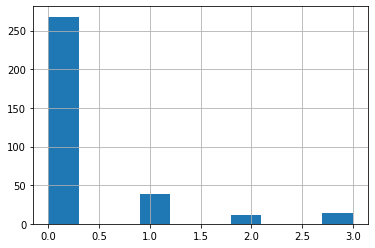

In [58]:
col_info(df.failures)

17 пропусков, заменим их на 0.

In [59]:
df.failures = df.failures.fillna(0)

Явных выбросов нет

## Famrel
семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

Количество пропусков: 23,
count    327.000000
mean       3.938838
std        0.944433
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64,
Распределение:
 4.0    160
 5.0     90
 3.0     54
 2.0     15
 1.0      7
-1.0      1
Name: famrel, dtype: int64,


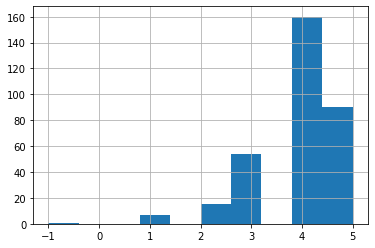

In [60]:
col_info(df.famrel)

Значение "-1" явно является выбросом, удалим эту запись.

In [61]:
df = df.loc[df.famrel>=0]

Заменим пропуски на "4" т.к. значение близко к среднему

In [62]:
df.famrel = df.famrel.fillna(4)

## Freetime
свободное время после школы (от 1 - очень мало до 5 - очень мого)

Количество пропусков: 8,
count    318.000000
mean       3.245283
std        0.993461
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64,
Распределение:
3.0    127
4.0     94
2.0     50
5.0     32
1.0     15
Name: freetime, dtype: int64,


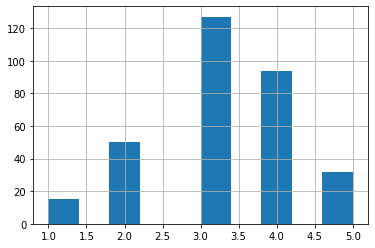

In [63]:
col_info(df.freetime)

В данном признаке всего 8 пропусков, предлагаю заменить на "3" т.к. это близко к среднему.
Явных выбросов нет.

In [64]:
df.freetime = df.freetime.fillna(3)

## Goout
проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

Количество пропусков: 7,
count    319.000000
mean       3.100313
std        1.100014
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64,
Распределение:
3.0    111
2.0     82
4.0     66
5.0     42
1.0     18
Name: goout, dtype: int64,


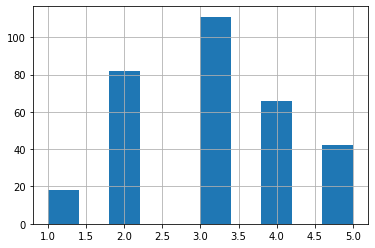

In [65]:
col_info(df.goout)

В данном признаке всего 7 пропусков, предлагаю заменить на "3" т.к. это близко к среднему.
Явных выбросов нет.

In [66]:
df.goout = df.goout.fillna(3)

## Health
текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

Количество пропусков: 13,
count    313.000000
mean       3.507987
std        1.375414
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64,
Распределение:
5.0    107
3.0     77
4.0     56
1.0     38
2.0     35
Name: health, dtype: int64,


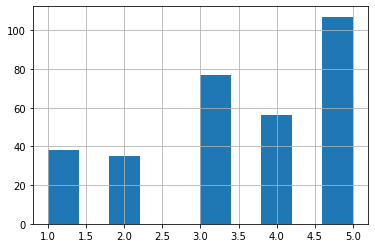

In [67]:
col_info(df.health)

В данном признаке 13 пропусков, предлагаю заменить на "4", это немного ближе к среднему, чем "3".
Явных выбросов нет.

In [68]:
df.health = df.health.fillna(4)

# Корреляционный анализ

Выясним, какие столбцы коррелируют с результатом экзаменов. Это поможет понять, какие параметры стоит оставить для модели, а какие - исключить.

Корреляцию рассмотрим только для числовых столбцов.

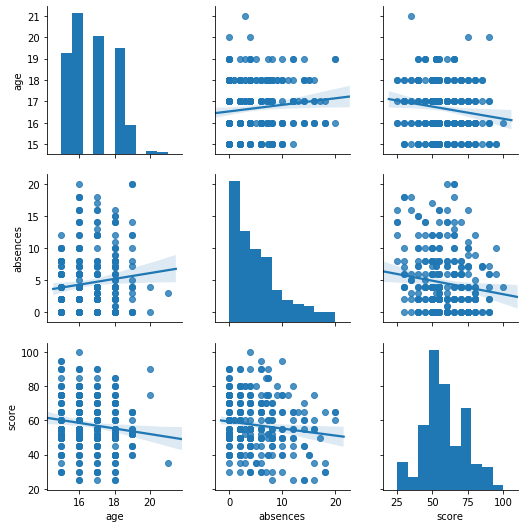

In [69]:
sns.pairplot(df[['age','absences','score']], kind = 'reg')

Используем для наглядности матрицу корреляций

In [70]:
df[['age','absences','score']].corr()

,age,absences,score
age,1.000000,0.117958,-0.136876
absences,0.117958,1.000000,-0.131662
score,-0.136876,-0.131662,1.000000


Видим, что сильно скоррелированных признаков нет. На результат отрицательно сказываются возраст и количество прогулов.

Теперь попробуем применить корреляционный анализ в том числе и для категориальных признаков. К результату стоит отнестись скептически, но посмотреть интересно.

т.к. столбцов много, воспользуемся тепловой картой.

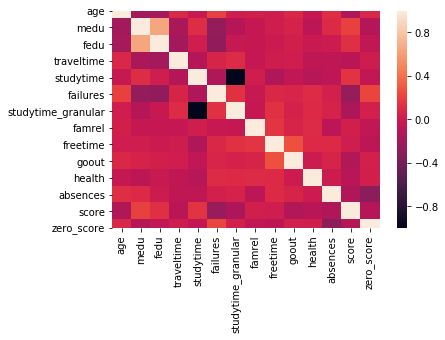

In [71]:
corr = df.corr()
sns.heatmap(corr)

Используем для наглядности матрицу корреляций

In [72]:
df.corr()

,age,medu,fedu,traveltime,studytime,failures,studytime_granular,famrel,freetime,goout,health,absences,score,zero_score
age,1.000000,-0.180488,-0.179292,0.089946,-0.016818,0.200868,0.016818,0.038581,0.021733,0.092343,-0.028547,0.117958,-0.136876,0.084383
medu,-0.180488,1.000000,0.644850,-0.161332,0.110058,-0.257401,-0.110058,-0.025035,0.027550,0.060875,-0.069632,0.095076,0.201589,-0.111155
fedu,-0.179292,0.644850,1.000000,-0.187679,0.017789,-0.270419,-0.017789,-0.028921,-0.004892,0.032650,-0.013625,0.006177,0.131734,-0.050963
traveltime,0.089946,-0.161332,-0.187679,1.000000,-0.102380,0.070090,0.102380,-0.036621,0.014668,0.020922,-0.056806,-0.054740,-0.084099,0.015616
studytime,-0.016818,0.110058,0.017789,-0.102380,1.000000,-0.140091,-1.000000,0.030537,-0.133793,-0.051070,-0.096557,-0.060398,0.147101,-0.040166
failures,0.200868,-0.257401,-0.270419,0.070090,-0.140091,1.000000,0.140091,-0.016852,0.086858,0.076597,0.101946,0.044478,-0.244970,0.223041
studytime_granular,0.016818,-0.110058,-0.017789,0.102380,-1.000000,0.140091,1.000000,-0.030537,0.133793,0.051070,0.096557,0.060398,-0.147101,0.040166
famrel,0.038581,-0.025035,-0.028921,-0.036621,0.030537,-0.016852,-0.030537,1.000000,0.154357,0.063948,0.105450,-0.072105,0.035026,-0.054240
freetime,0.021733,0.027550,-0.004892,0.014668,-0.133793,0.086858,0.133793,0.154357,1.000000,0.265919,0.099378,0.096747,0.022860,-0.066871
goout,0.092343,0.060875,0.032650,0.020922,-0.051070,0.076597,0.051070,0.063948,0.265919,1.000000,0.004430,0.063080,-0.119360,0.039606


Переменные studytime и studytime_granular полностью скоррелированы. На целевую переменную они влияют одинаково. Удалим studytime_granular.

In [73]:
df.drop(['studytime_granular'],axis=1)

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score,zero_score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.000000,0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.000000,0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.000000,0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.000000,0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,MS,F,18,U,GT3,T,1.0,1.0,other,other,course,mother,1.0,2.0,1.0,no,no,no,yes,yes,yes,NaN,no,1.0,1.0,1.0,5.0,0.0,52.264151,1
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.000000,0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.000000,0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.000000,0


Анализ оставшихся переменных показывает, что на оценку в значительной степени положительно влияют образование родителей и время, потраченное на учебу; отрицательно - неудачи и прогулы, что вполне логично.
Но опять же, эти признаки категориальные и лучше мы их посмотрим boxplot'ом.

# Анализ номинативных переменных

Посмотрим на распределение рейтинга в зависимости от значения номинативных переменных.

Номинативные переменные, которые осталось рассмотреть: все, кроме age, absences, score.

In [74]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (12, 6))
    sns.boxplot(x=column, y='score', 
                data=df.loc[df.loc[:, column].isin(df.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

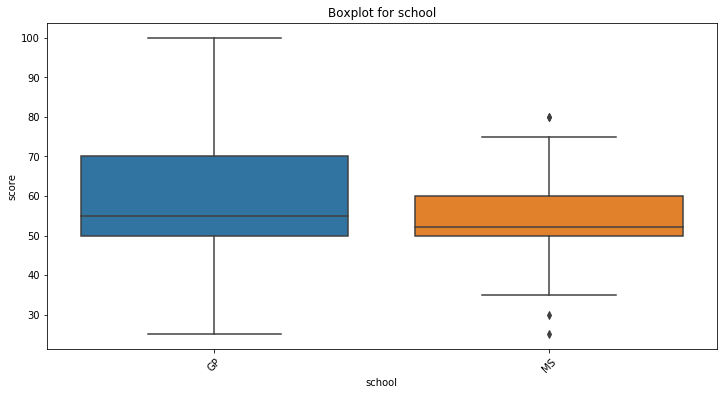

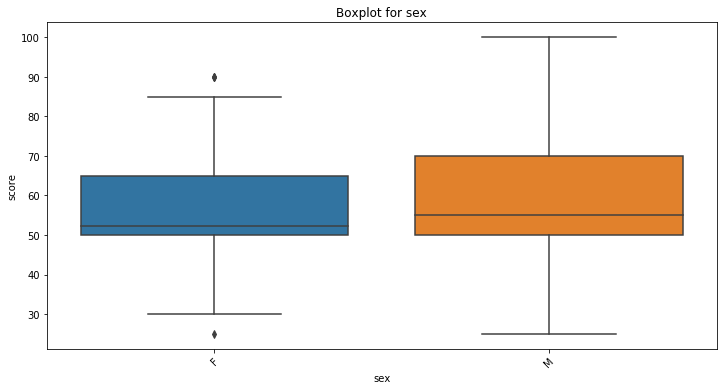

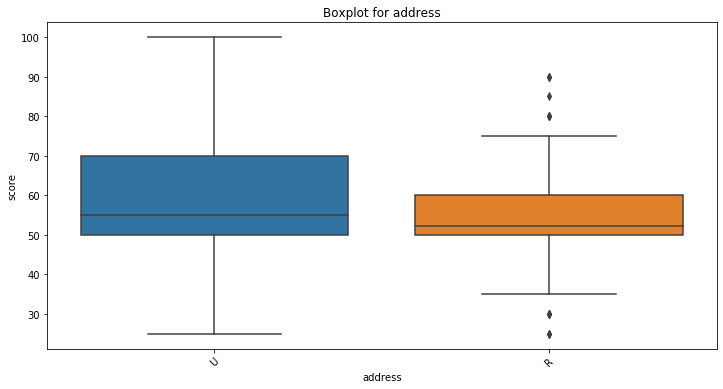

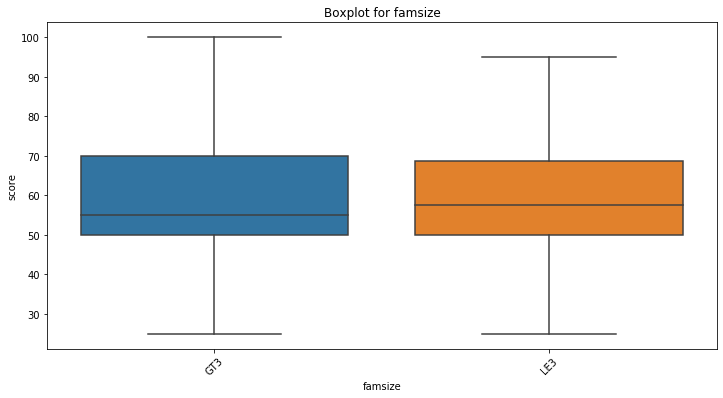

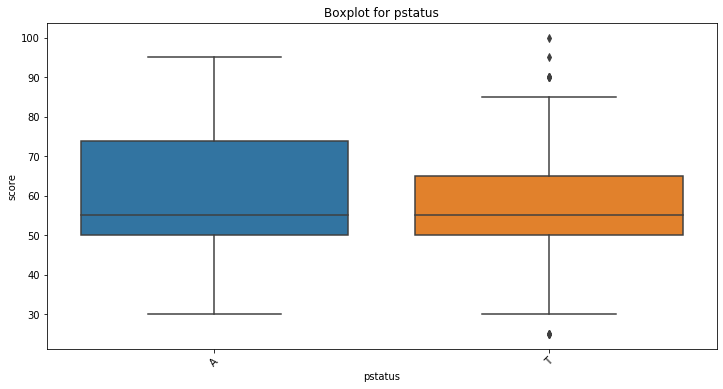

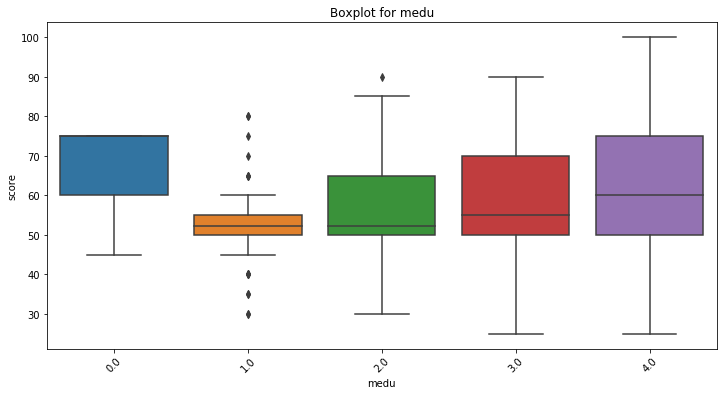

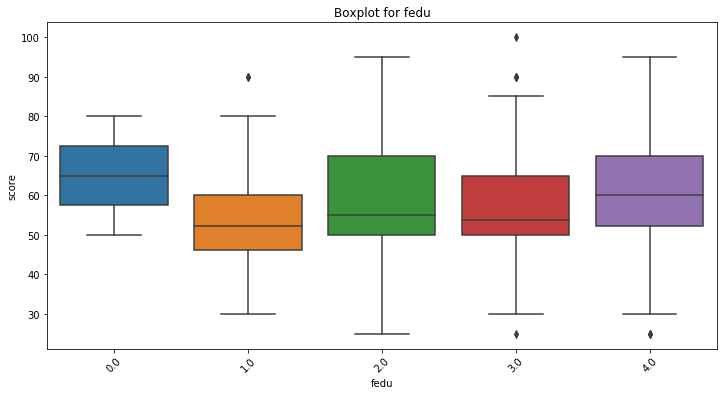

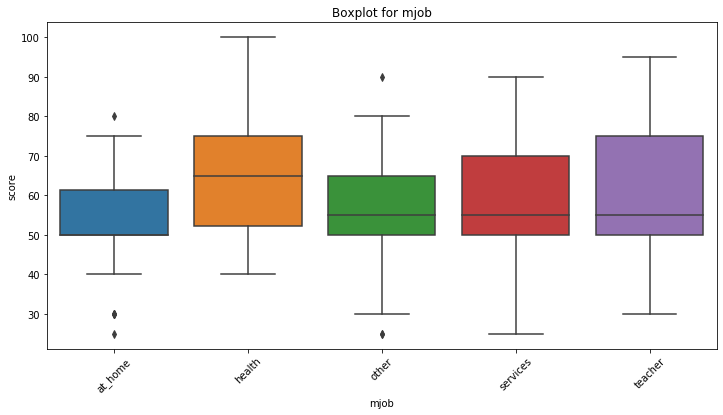

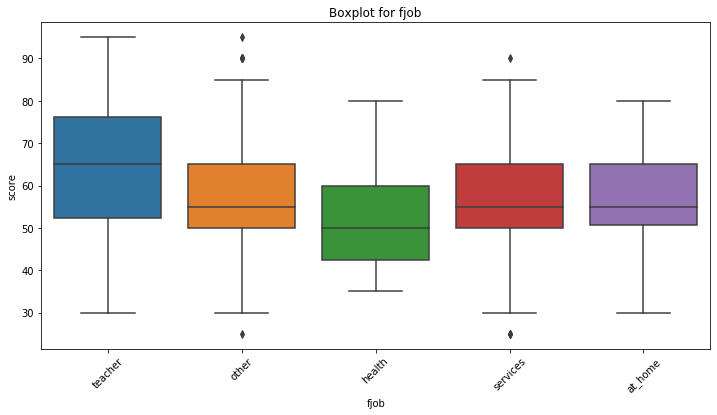

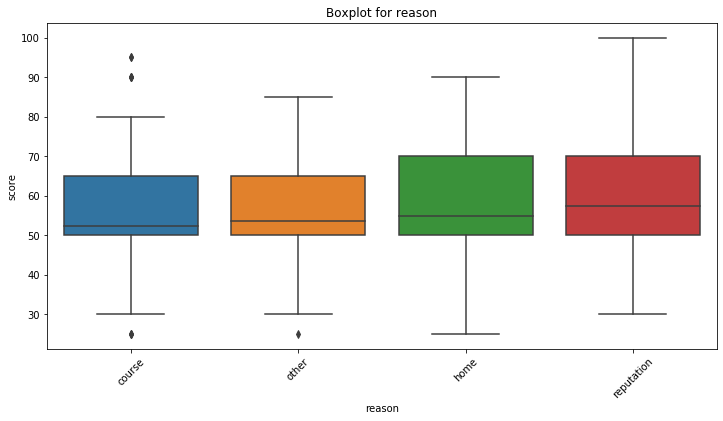

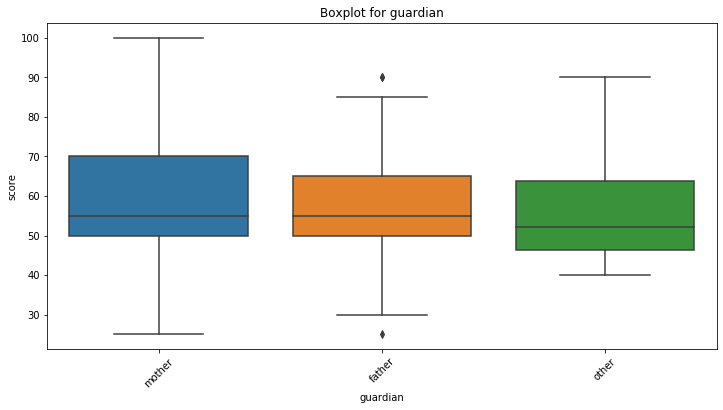

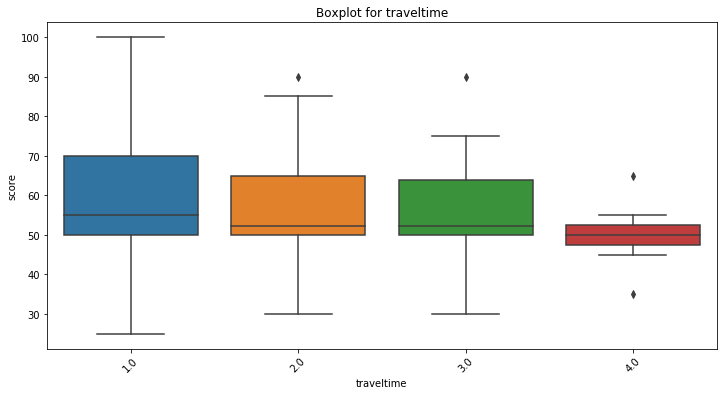

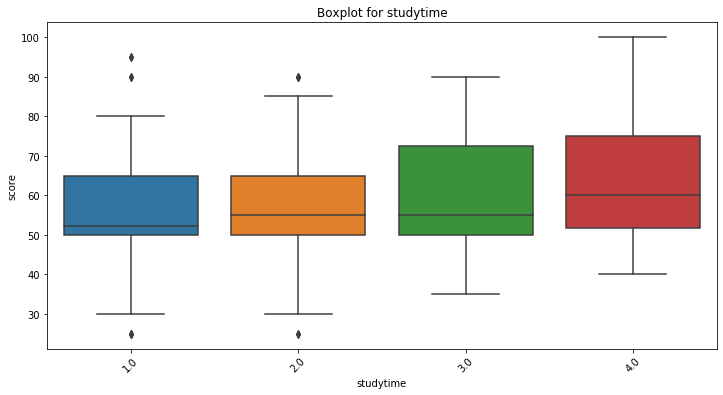

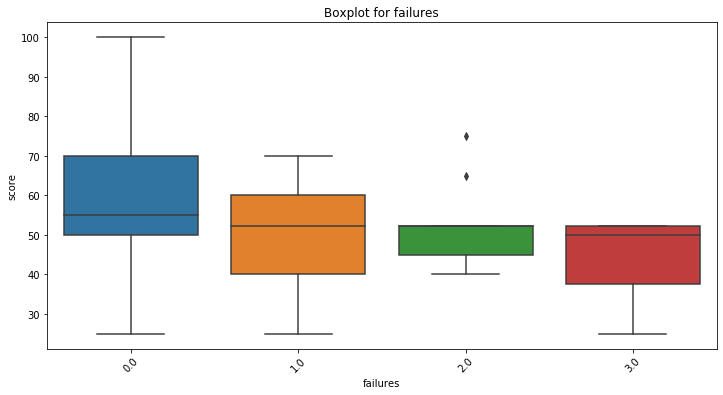

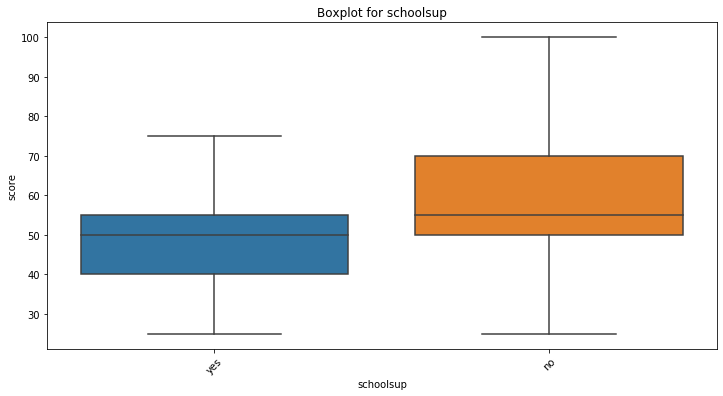

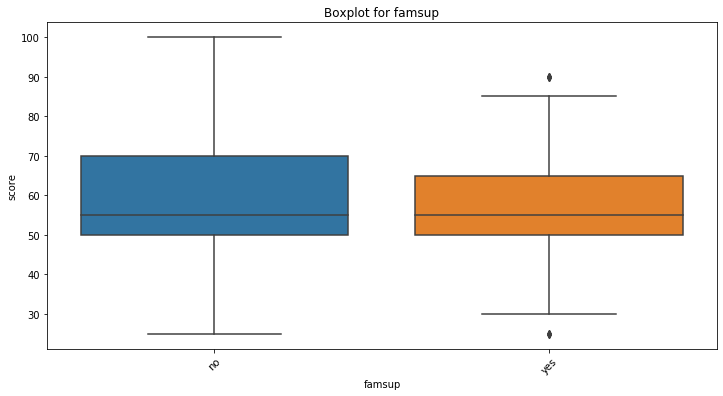

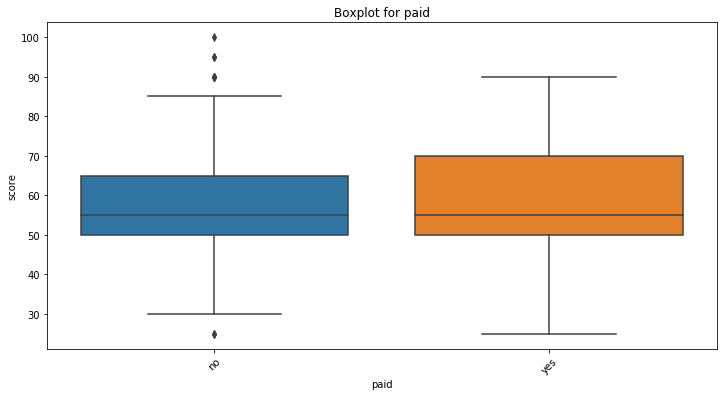

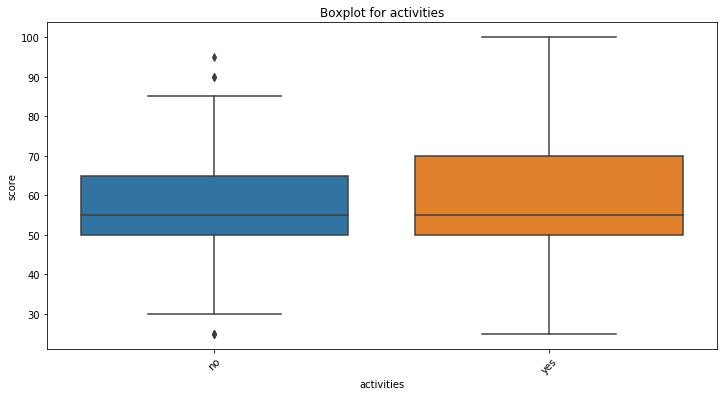

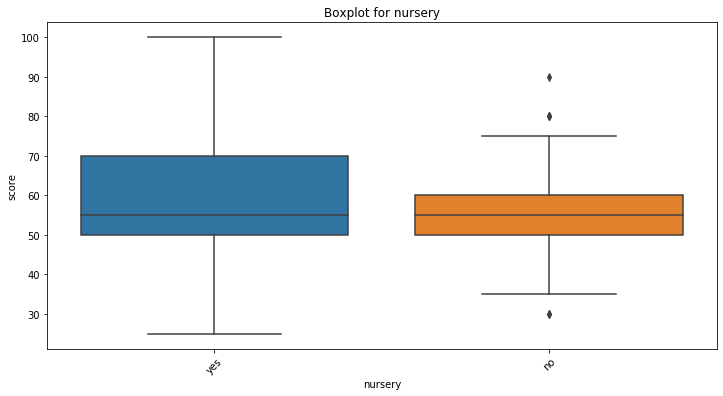

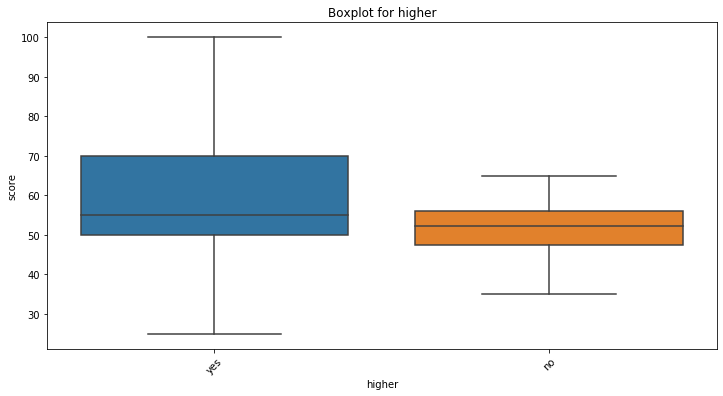

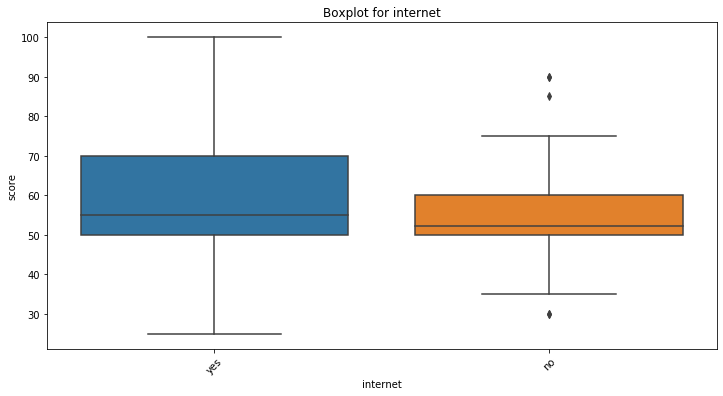

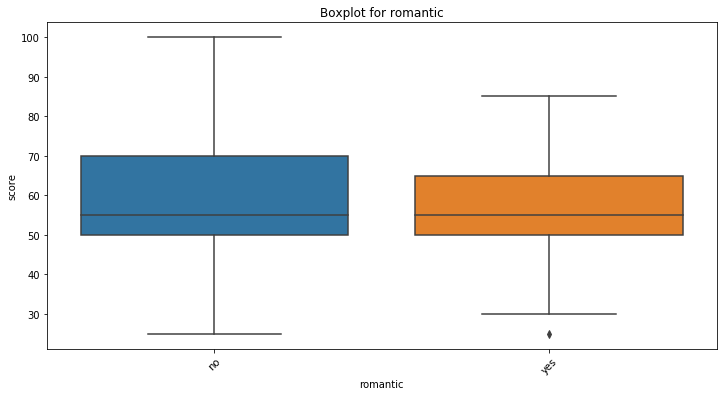

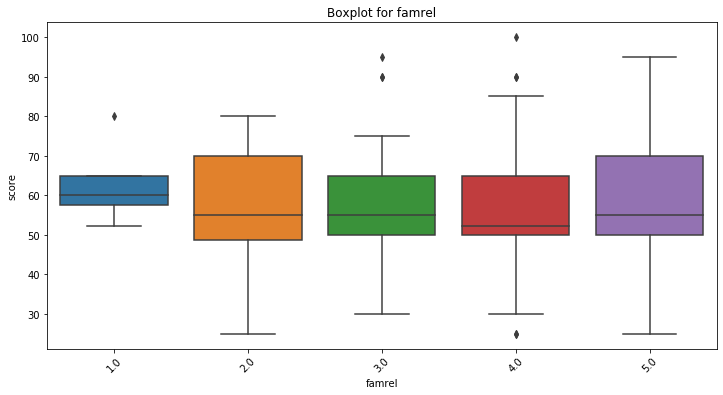

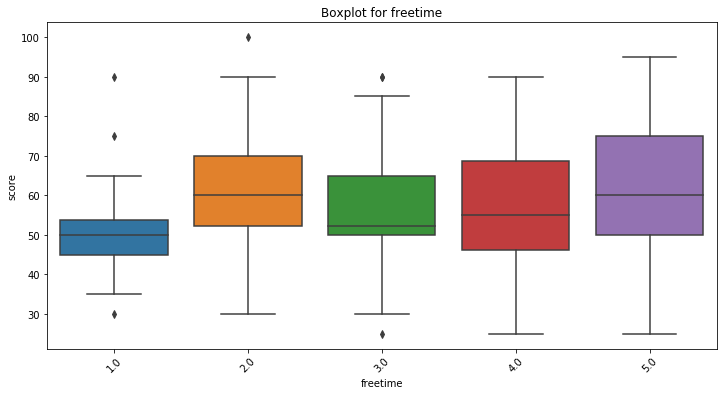

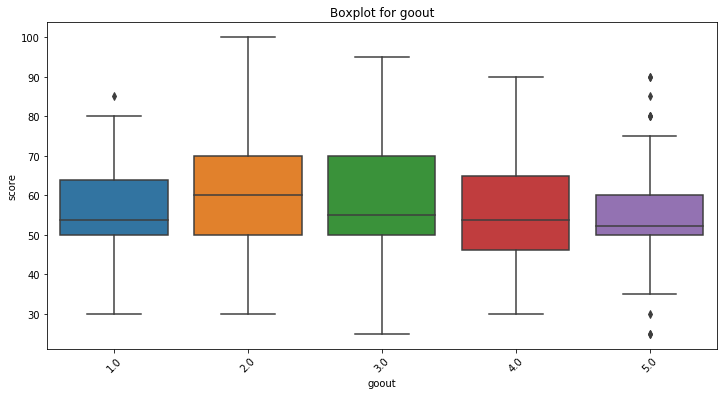

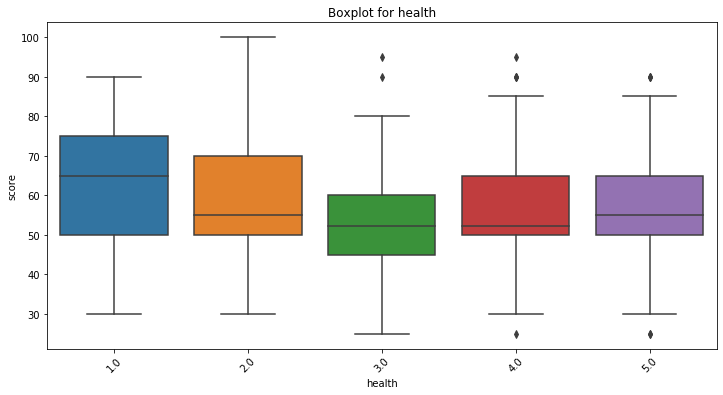

In [75]:
for col in ['school',
            'sex',
            'address',
            'famsize',
            'pstatus',
            'medu',
            'fedu',
            'mjob',
            'fjob',
            'reason',
            'guardian',
            'traveltime',
            'studytime',
            'failures',
            'schoolsup',
            'famsup',
            'paid',
            'activities',
            'nursery',
            'higher',
            'internet',
            'romantic',
            'famrel',
            'freetime',
            'goout',
            'health',
            ]:
    get_boxplot(col)

По графикам похоже, что все параметры, кроме famsize, pstatus, reason, guardian, famsup, paid, activities, romantic, famrel, goout могут влиять на оценку по математике.

Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения оценок по математике по различным параметрам неразличимы:

In [76]:
def get_stat_dif(column):
    cols = df.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'], 
                        df.loc[df.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [77]:
for col in ['school',
            'sex',
            'address',
            'famsize',
            'pstatus',
            'medu',
            'fedu',
            'mjob',
            'fjob',
            'reason',
            'guardian',
            'traveltime',
            'studytime',
            'failures',
            'schoolsup',
            'famsup',
            'paid',
            'activities',
            'nursery',
            'higher',
            'internet',
            'romantic',
            'famrel',
            'freetime',
            'goout',
            'health',
            ]:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки medu
Найдены статистически значимые различия для колонки fedu
Найдены статистически значимые различия для колонки mjob
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки schoolsup


Как мы видим, серьёзно отличаются семь параметров: sex, address, medu, fedu, mjob, failures и schoolsup. Оставим эти переменные в датасете для дальнейшего построения модели.

 Итак, в нашем случае важные переменные, которые, возможно, оказывают влияние на оценку, это: age, absences, sex, address, medu, fedu, mjob, failures и schoolsup.


In [78]:
df_for_model = df.loc[:, ['age',
                'absences',
                'sex',
                'address',
                'medu',
                'fedu',
                'mjob',
                'failures',
                'schoolsup'
               ]]

In [79]:
df_for_model.head()

,age,absences,sex,address,medu,fedu,mjob,failures,schoolsup
0,18,6.0,F,U,4.0,4.0,at_home,0.0,yes
1,17,4.0,F,U,1.0,1.0,at_home,0.0,no
2,15,10.0,F,U,1.0,1.0,at_home,3.0,yes
3,15,2.0,F,U,4.0,2.0,health,0.0,no
4,16,4.0,F,U,3.0,3.0,other,0.0,no


# Выводы

В результате EDA для анализа влияния параметров ученика на экзамен по математике были получены следующие выводы:
    1. В данных достаточно много пустых значений, практически каждый признак содержит значительное количество пропусков.
    2. Явных выбросов и ошибок в данных мало, что позволяет сделать вывод о том, что данные достаточно чистые.
    3. Положительная корреляция параметра age и score может говорить о том, что с годами ученики хуже сдают экзамен по математике, однака эта корреляция может быть ложной.
    4. Целевая переменная score имеет большое количество нулевых значений, что может судить о прогуле или удаления ученика с экзамена.
    5. В данной выборке мальчики лучше сдали экзамены чем девочки.
    6. Анализ переменных показывает, что на оценки положительно влияют: проживание в городе, образование родителей и место работы матери; отрицательно - дополнительная образовательная поддержка, неудачи и прогулы, что вполне логично.
       Забавно, что время, потраченное на учебу, оказывает незначительное влияние, хотя положительная зависимость явно просматривается.
    7. Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели: age, absences, sex, address, medu, fedu, mjob, failures и schoolsup.